In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
heatr_data= pd.read_excel('D:/dataset/Heart.xlsx',header=0)
# print(heatr_data)

In [3]:
X = heatr_data.values[:,:7]
y = heatr_data.values[:,7]
# print(X)
# print(y)

In [4]:
# the counts ndim dataset
heatr_data.ndim

2

In [5]:
#this is describe
heatr_data.describe()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,0.734127,60.720238,4.180556,141.200397,178.777778,14.916865,6.285714,2.156746
std,0.442236,13.588203,0.509491,90.986276,39.853287,14.684976,0.452203,0.363922
min,0.000000,31.000000,0.000000,11.000000,88.000000,10.000000,6.000000,2.000000
25%,0.000000,52.000000,4.000000,81.750000,147.000000,12.500000,6.000000,2.000000
50%,1.000000,61.000000,4.000000,117.000000,182.000000,13.000000,6.000000,2.000000
75%,1.000000,70.000000,4.000000,157.000000,209.000000,13.800000,7.000000,2.000000
max,1.000000,92.000000,5.000000,508.000000,272.000000,138.000000,7.000000,3.000000


In [6]:
#5 is the last row of the data
heatr_data.tail()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
499,0,70,4,140,187,12.0,6,3
500,1,62,4,135,108,10.0,6,3
501,1,72,4,137,107,12.0,6,3
502,1,42,4,138,100,12.0,6,3
503,1,38,4,110,142,11.0,6,3


In [7]:
#Fills NA / NaN values using the specified method.
heatr_data.fillna('')

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2
...,...,...,...,...,...,...,...,...
499,0,70,4,140,187,12.0,6,3
500,1,62,4,135,108,10.0,6,3
501,1,72,4,137,107,12.0,6,3
502,1,42,4,138,100,12.0,6,3


In [8]:
#chake in value mesing
heatr_data.isnull().sum()

Gender        0
Age           0
Troponin Q    0
Tri sec       0
Chole sec     0
PT pri        0
CKMB pri      0
sick          0
dtype: int64

In [9]:
# counts sick heart 
heatr_data['sick'].value_counts()
            

2    425
3     79
Name: sick, dtype: int64

In [10]:
X=heatr_data['sick'].values
y = heatr_data['CKMB pri'].values

In [11]:
# X

In [12]:
# y

In [13]:
# chake in valuese mesing heatr_data[CKMB pri] and heatr_data[Troponin Q]
print(heatr_data['CKMB pri'].isnull().sum())
print(heatr_data['Troponin Q'].isnull().sum())

0
0


In [14]:
heatr_data.shape

(504, 8)

In [15]:
# chak Qualitative tryponin
heatr_data['Troponin Q'].value_counts

<bound method IndexOpsMixin.value_counts of 0      4
1      4
2      4
3      4
4      4
      ..
499    4
500    4
501    4
502    4
503    4
Name: Troponin Q, Length: 504, dtype: int64>

In [16]:
# counts sex betwen male and female
heatr_data['Gender'].value_counts()

1    370
0    134
Name: Gender, dtype: int64

In [17]:
X = heatr_data.drop(columns='sick',axis=1)
y = heatr_data['sick'] 

In [18]:
X

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri
0,1,82,4,157,196,12.5,6
1,1,60,4,183,120,13.0,6
2,1,58,4,148,182,13.0,6
3,1,75,4,60,172,13.4,7
4,1,51,4,163,160,13.1,6
...,...,...,...,...,...,...,...
499,0,70,4,140,187,12.0,6
500,1,62,4,135,108,10.0,6
501,1,72,4,137,107,12.0,6
502,1,42,4,138,100,12.0,6


In [19]:
y

0      2
1      2
2      2
3      2
4      2
      ..
499    3
500    3
501    3
502    3
503    3
Name: sick, Length: 504, dtype: int64

In [20]:
#Measurement of statistical data
heatr_data.head()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2


In [44]:
# Data specifications
heatr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      504 non-null    int64  
 1   Age         504 non-null    int64  
 2   Troponin Q  504 non-null    int64  
 3   Tri sec     504 non-null    int64  
 4   Chole sec   504 non-null    int64  
 5   PT pri      504 non-null    float64
 6   CKMB pri    504 non-null    int64  
 7   sick        504 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 31.6 KB


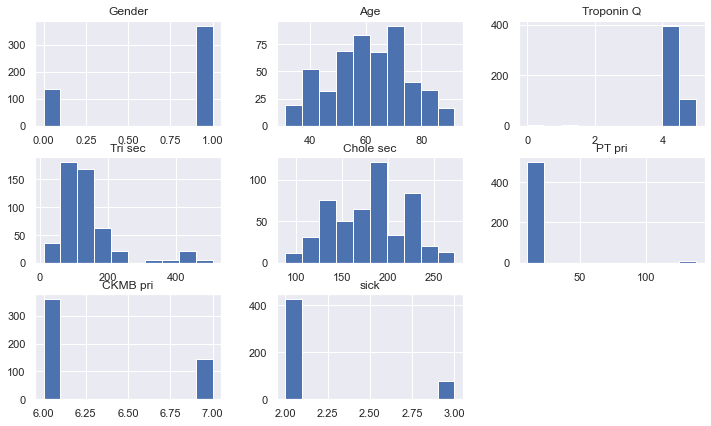

In [45]:
# Apply the default theme
heatr_data.hist(figsize=(12, 12),layout=(5, 3));

In [46]:
#Check the relationships between the columns
heatr_data.corr()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
Gender,1.000000,-0.026298,0.019363,0.047277,0.056764,0.002345,-0.017042,-0.123480
Age,-0.026298,1.000000,0.047227,-0.052471,0.019324,0.030997,0.070302,-0.129012
Troponin Q,0.019363,0.047227,1.000000,-0.011718,0.062391,0.032382,0.189839,-0.152941
Tri sec,0.047277,-0.052471,-0.011718,1.000000,0.500812,0.014485,0.024215,-0.184135
Chole sec,0.056764,0.019324,0.062391,0.500812,1.000000,-0.081005,0.115720,-0.221849
PT pri,0.002345,0.030997,0.032382,0.014485,-0.081005,1.000000,0.047114,-0.089070
CKMB pri,-0.017042,0.070302,0.189839,0.024215,0.115720,0.047114,1.000000,-0.272677
sick,-0.123480,-0.129012,-0.152941,-0.184135,-0.221849,-0.089070,-0.272677,1.000000


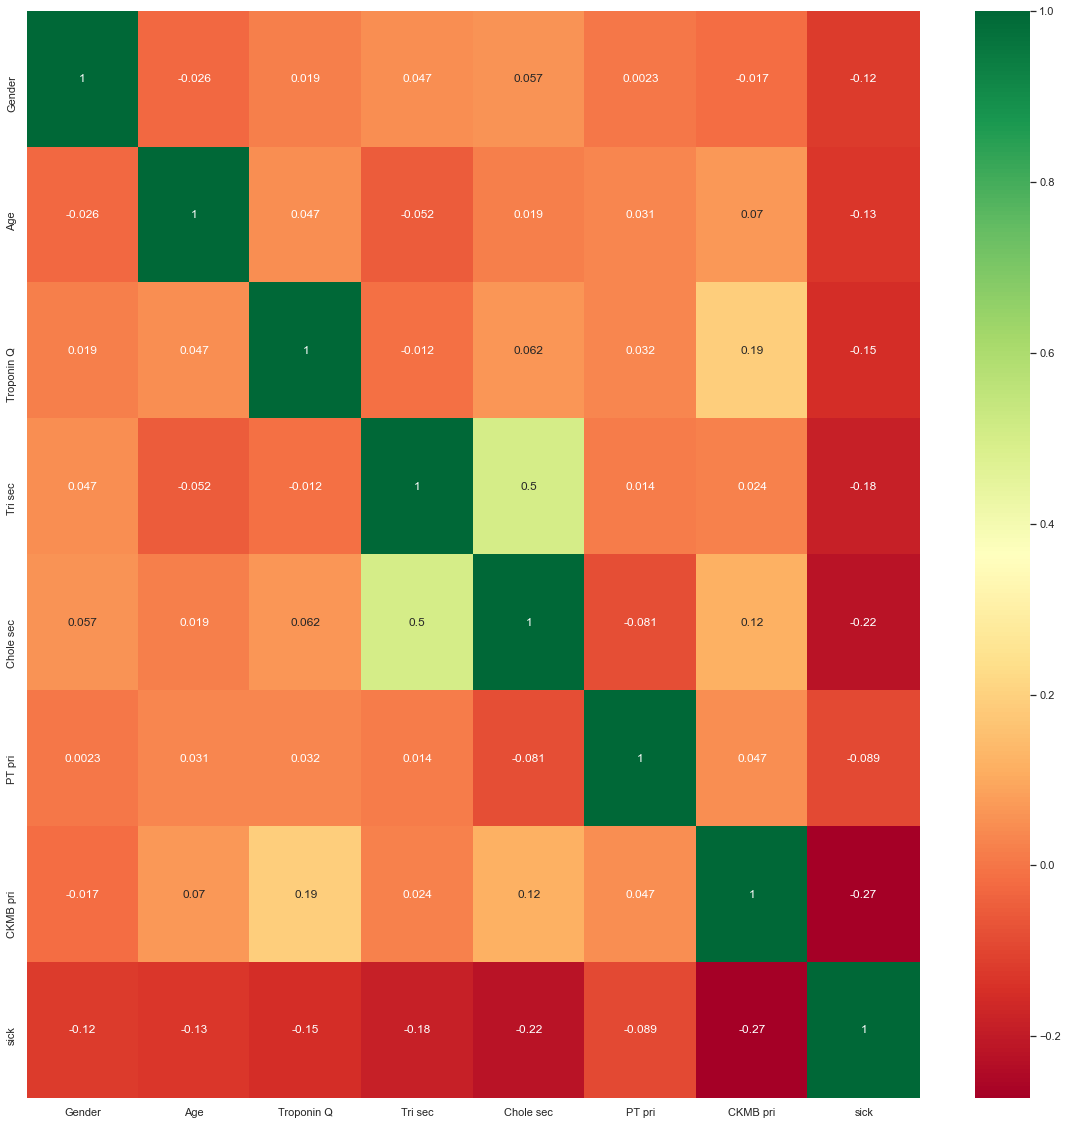

In [47]:
# plt.figure(figsize=(20,20))
# sns.heatmap(heatr_data.corr(),annot=True,cmap='terrain');
#===========================describe===============================================
#Of course, the plot can be drawn from the above method,
#ut the difference is in the color of the plot
# ===========================================================
corrmat = heatr_data.corr()
# plot heat map
top_corr_features=corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(heatr_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

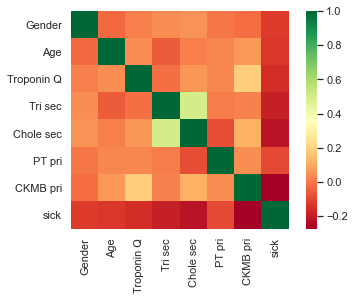

In [48]:
#In the plot below the green diameter is the number 1, 
#and the other colors represent the positive or negative
# of the data columns.
sns.heatmap(heatr_data.corr(),square=True,cmap="RdYlGn");

In [49]:
#Discover duplicates
heatr_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
499    False
500    False
501    False
502    False
503    False
Length: 504, dtype: bool

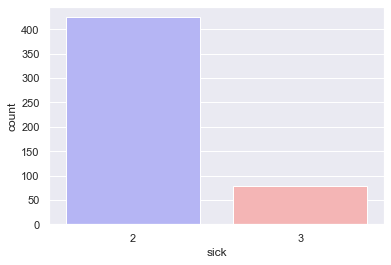

In [50]:
sns.countplot(x="sick", data=heatr_data, palette="bwr")
plt.show()

In [51]:
#Check to remove duplicates
heatr_data.drop_duplicates()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2
...,...,...,...,...,...,...,...,...
499,0,70,4,140,187,12.0,6,3
500,1,62,4,135,108,10.0,6,3
501,1,72,4,137,107,12.0,6,3
502,1,42,4,138,100,12.0,6,3


In [52]:
countNoDisease = len(heatr_data[heatr_data.sick ==3])
countHaveDisease = len(heatr_data[heatr_data.sick == 2])
print("Percentage of Patients Havent Heart Disease: {:.2f}%".format((countNoDisease / (len(heatr_data.sick))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heatr_data.sick))*100)))

Percentage of Patients Havent Heart Disease: 15.67%
Percentage of Patients Have Heart Disease: 84.33%


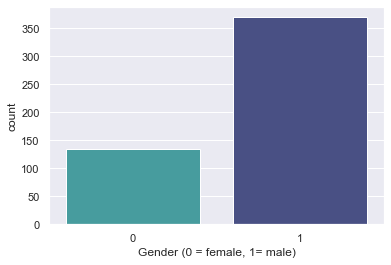

In [53]:
sns.countplot(x='Gender', data=heatr_data, palette="mako_r")
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

In [54]:
#Removal of some cells by Drupna
heatr_data.dropna()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2
...,...,...,...,...,...,...,...,...
499,0,70,4,140,187,12.0,6,3
500,1,62,4,135,108,10.0,6,3
501,1,72,4,137,107,12.0,6,3
502,1,42,4,138,100,12.0,6,3


In [55]:
heatr_data = pd.get_dummies(heatr_data, drop_first=True)
heatr_data.head()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2


In [56]:
#Creat split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33, random_state = 42)

In [57]:
print(X.shape,X_train.shape,X_test.shape)

(504, 7) (337, 7) (167, 7)


In [58]:
male =0
femal =1
if male > femal:
    print("Myocardial infarction is more common in men than women")
elif male == femal:
    print("Myocardial infarction is equal in men and women")
else:
    print("Myocardial infarction is more common in women than men")

Myocardial infarction is more common in women than men


In [59]:
model = DecisionTreeClassifier(random_state=42)

In [60]:
model = DecisionTreeClassifier(
    criterion="entropy",
    splitter='best',
    max_depth=2,
    min_samples_split=0.2,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.2,
    max_features="log2",
    random_state=42,
    max_leaf_nodes=3,
    min_impurity_decrease=0.2,
    min_impurity_split=0.2,
    class_weight="balanced",
    ccp_alpha=0.15,)


model.fit(X_train, y_train)
model_predict= model.predict(X_test)
model.score(X_train,y_train)


0.9169139465875371

In [61]:
model = DecisionTreeClassifier()
model.fit(X_test, y_test)

DecisionTreeClassifier()

In [62]:
X_test_prediction = model.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction,y_test)
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  1.0


In [63]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [64]:
X = heatr_data.values[:,:7]
y = heatr_data.values[:,7]
# print(X)
# print(y)

In [65]:
X = heatr_data.values[:,:7]
y = heatr_data.values[:,7]
# print(X)
# print(y)

In [66]:
heatr_data.ndim

2

In [67]:
heatr_data.shape

(504, 8)

In [68]:
heatr_data.corr()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
Gender,1.000000,-0.026298,0.019363,0.047277,0.056764,0.002345,-0.017042,-0.123480
Age,-0.026298,1.000000,0.047227,-0.052471,0.019324,0.030997,0.070302,-0.129012
Troponin Q,0.019363,0.047227,1.000000,-0.011718,0.062391,0.032382,0.189839,-0.152941
Tri sec,0.047277,-0.052471,-0.011718,1.000000,0.500812,0.014485,0.024215,-0.184135
Chole sec,0.056764,0.019324,0.062391,0.500812,1.000000,-0.081005,0.115720,-0.221849
PT pri,0.002345,0.030997,0.032382,0.014485,-0.081005,1.000000,0.047114,-0.089070
CKMB pri,-0.017042,0.070302,0.189839,0.024215,0.115720,0.047114,1.000000,-0.272677
sick,-0.123480,-0.129012,-0.152941,-0.184135,-0.221849,-0.089070,-0.272677,1.000000


In [21]:
heatr_data.shape

(504, 8)

In [69]:
heatr_data.describe()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,0.734127,60.720238,4.180556,141.200397,178.777778,14.916865,6.285714,2.156746
std,0.442236,13.588203,0.509491,90.986276,39.853287,14.684976,0.452203,0.363922
min,0.000000,31.000000,0.000000,11.000000,88.000000,10.000000,6.000000,2.000000
25%,0.000000,52.000000,4.000000,81.750000,147.000000,12.500000,6.000000,2.000000
50%,1.000000,61.000000,4.000000,117.000000,182.000000,13.000000,6.000000,2.000000
75%,1.000000,70.000000,4.000000,157.000000,209.000000,13.800000,7.000000,2.000000
max,1.000000,92.000000,5.000000,508.000000,272.000000,138.000000,7.000000,3.000000


In [70]:
heatr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      504 non-null    int64  
 1   Age         504 non-null    int64  
 2   Troponin Q  504 non-null    int64  
 3   Tri sec     504 non-null    int64  
 4   Chole sec   504 non-null    int64  
 5   PT pri      504 non-null    float64
 6   CKMB pri    504 non-null    int64  
 7   sick        504 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 31.6 KB


In [71]:
heatr_data.tail()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
499,0,70,4,140,187,12.0,6,3
500,1,62,4,135,108,10.0,6,3
501,1,72,4,137,107,12.0,6,3
502,1,42,4,138,100,12.0,6,3
503,1,38,4,110,142,11.0,6,3


In [72]:
heatr_data.drop_duplicates()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2
...,...,...,...,...,...,...,...,...
499,0,70,4,140,187,12.0,6,3
500,1,62,4,135,108,10.0,6,3
501,1,72,4,137,107,12.0,6,3
502,1,42,4,138,100,12.0,6,3


In [73]:
heatr_data.isnull().sum()

Gender        0
Age           0
Troponin Q    0
Tri sec       0
Chole sec     0
PT pri        0
CKMB pri      0
sick          0
dtype: int64

In [74]:
heatr_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
499    False
500    False
501    False
502    False
503    False
Length: 504, dtype: bool

In [75]:
# counts sick heart 
heatr_data['sick'].value_counts()
            

2    425
3     79
Name: sick, dtype: int64

In [76]:
X=heatr_data['sick'].values
y = heatr_data['CKMB pri'].values

In [77]:
# X

In [78]:
# y

In [79]:
#Measurement of statistical data
heatr_data.head()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2


In [80]:
print(heatr_data['CKMB pri'].isnull().sum())
print(heatr_data['Troponin Q'].isnull().sum())

0
0


In [81]:
# chak Qualitative tryponin
heatr_data['Troponin Q'].value_counts

<bound method IndexOpsMixin.value_counts of 0      4
1      4
2      4
3      4
4      4
      ..
499    4
500    4
501    4
502    4
503    4
Name: Troponin Q, Length: 504, dtype: int64>

In [82]:
# counts sex betwen male and female
heatr_data['Gender'].value_counts()

1    370
0    134
Name: Gender, dtype: int64

In [83]:
X = heatr_data.drop(columns='sick',axis=1)
y = heatr_data['sick'] 

In [84]:
X

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri
0,1,82,4,157,196,12.5,6
1,1,60,4,183,120,13.0,6
2,1,58,4,148,182,13.0,6
3,1,75,4,60,172,13.4,7
4,1,51,4,163,160,13.1,6
...,...,...,...,...,...,...,...
499,0,70,4,140,187,12.0,6
500,1,62,4,135,108,10.0,6
501,1,72,4,137,107,12.0,6
502,1,42,4,138,100,12.0,6


In [85]:
y

0      2
1      2
2      2
3      2
4      2
      ..
499    3
500    3
501    3
502    3
503    3
Name: sick, Length: 504, dtype: int64

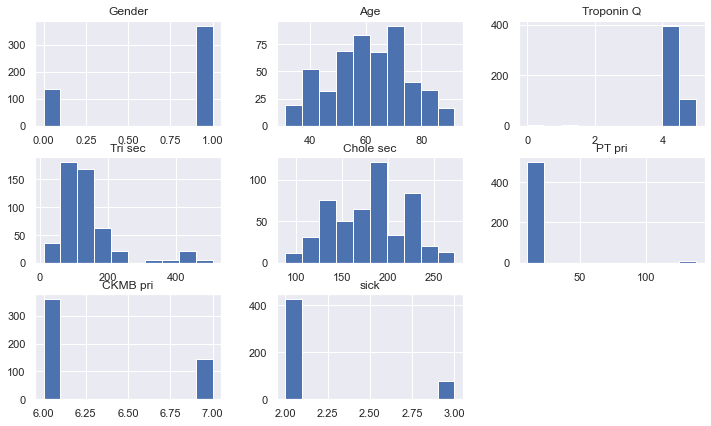

In [86]:
# Apply the default theme
heatr_data.hist(figsize=(12, 12),layout=(5, 3));

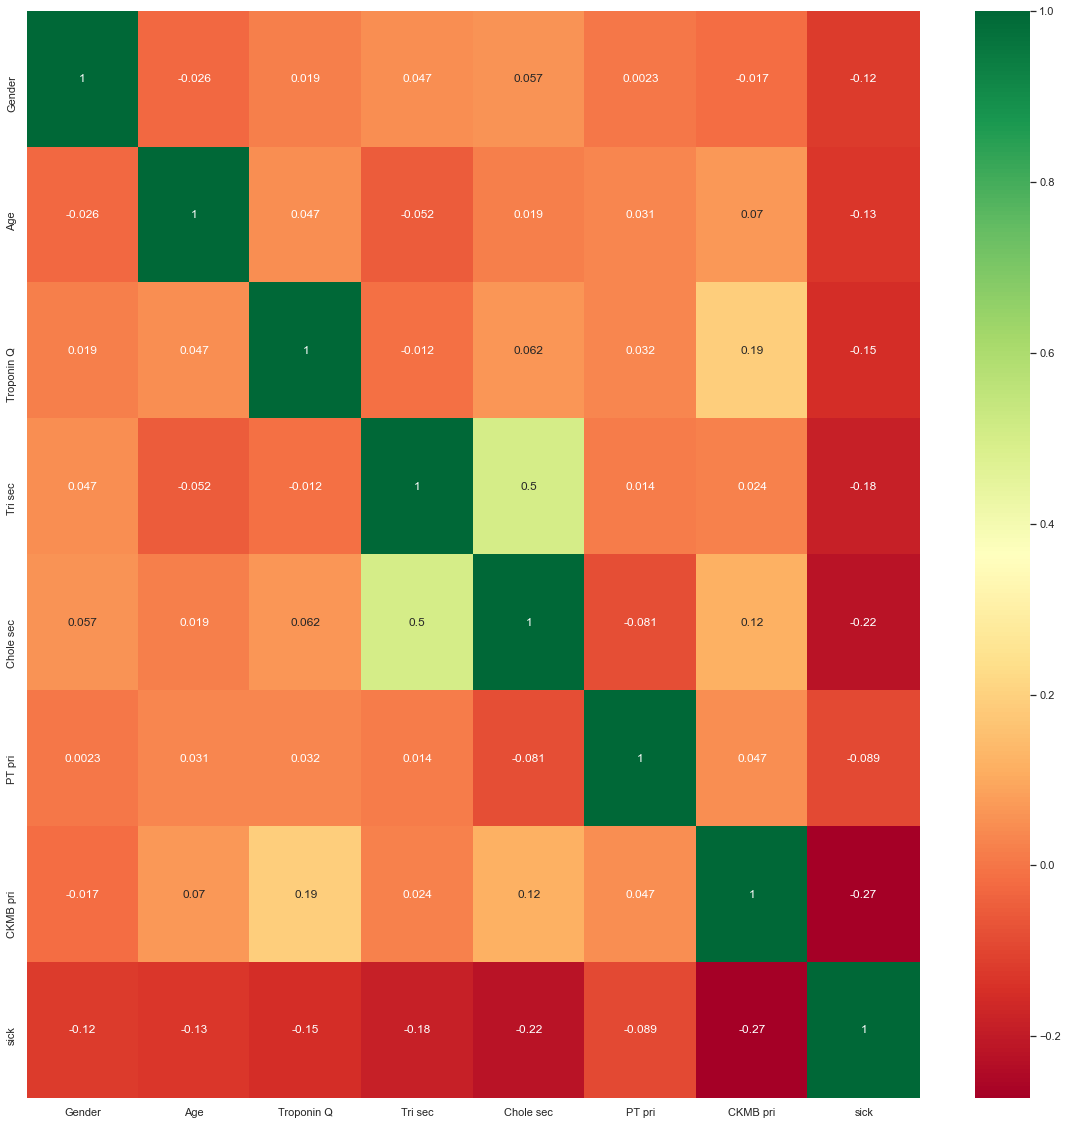

In [87]:
corrmat = heatr_data.corr()
# plot heat map
top_corr_features=corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(heatr_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

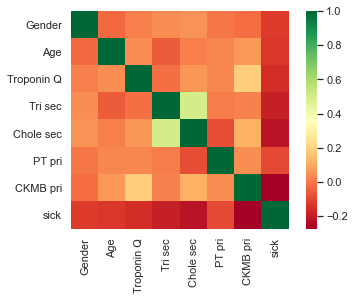

In [88]:
#In the plot below the green diameter is the number 1, 
#and the other colors represent the positive or negative
# of the data columns.
sns.heatmap(heatr_data.corr(),square=True,cmap="RdYlGn");

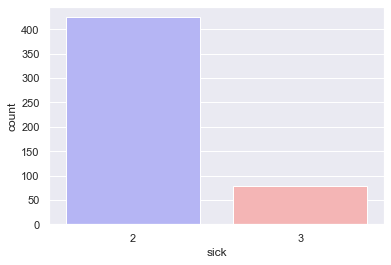

In [89]:
sns.countplot(x="sick", data=heatr_data, palette="bwr")
plt.show()

In [90]:
countNoDisease = len(heatr_data[heatr_data.sick ==3])
countHaveDisease = len(heatr_data[heatr_data.sick == 2])
print("Percentage of Patients Havent Heart Disease: {:.2f}%".format((countNoDisease / (len(heatr_data.sick))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heatr_data.sick))*100)))

Percentage of Patients Havent Heart Disease: 15.67%
Percentage of Patients Have Heart Disease: 84.33%


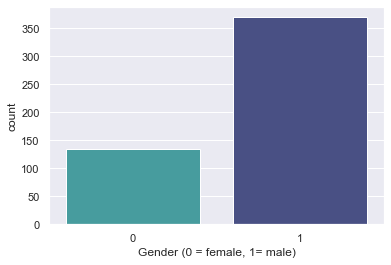

In [91]:
sns.countplot(x='Gender', data=heatr_data, palette="mako_r")
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

In [92]:
#Removal of some cells by Drupna
heatr_data.dropna()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2
...,...,...,...,...,...,...,...,...
499,0,70,4,140,187,12.0,6,3
500,1,62,4,135,108,10.0,6,3
501,1,72,4,137,107,12.0,6,3
502,1,42,4,138,100,12.0,6,3


In [93]:
heatr_data = pd.get_dummies(heatr_data, drop_first=True)
heatr_data.head()

,Gender,Age,Troponin Q,Tri sec,Chole sec,PT pri,CKMB pri,sick
0,1,82,4,157,196,12.5,6,2
1,1,60,4,183,120,13.0,6,2
2,1,58,4,148,182,13.0,6,2
3,1,75,4,60,172,13.4,7,2
4,1,51,4,163,160,13.1,6,2


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [95]:
print(X.shape,X_train.shape,X_test.shape)

(504, 7) (337, 7) (167, 7)


In [96]:
male =0
femal =1
if male > femal:
    print("Myocardial infarction is more common in men than women")
elif male == femal:
    print("Myocardial infarction is equal in men and women")
else:
    print("Myocardial infarction is more common in women than men")

Myocardial infarction is more common in women than men


In [97]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=0, max_iter=300).fit(X_train, y_train)



mlp=MLPClassifier(
    hidden_layer_sizes=(100,100),
    activation='relu',
    solver='sgd',
    alpha=0.0001,
    batch_size=256,
    learning_rate='adaptive',
    learning_rate_init= 0.0001,
    power_t=0.9,
    max_iter=300,
    shuffle=True,
    random_state=0,
    tol=1e-6,
    verbose=0,
    warm_start=bool,
    momentum=0.10,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.2,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=16000,
)
clf = MLPClassifier(hidden_layer_sizes=(100, 100), verbose=True, max_iter=300)
mlp.fit(X_train, y_train)

#In this way, you can check the function and itration
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

X_test_prediction = model.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction,y_test)
print('Accuracy Test Precision  data : ',test_data_accuracy)

Iteration 1, loss = 2.34841227
Iteration 2, loss = 2.05515463
Iteration 3, loss = 0.74710877
Iteration 4, loss = 1.09210152
Iteration 5, loss = 1.45463897
Iteration 6, loss = 1.43634041
Iteration 7, loss = 1.15316672
Iteration 8, loss = 0.72378822
Iteration 9, loss = 0.62804882
Iteration 10, loss = 0.85583063
Iteration 11, loss = 0.46398326
Iteration 12, loss = 0.57458333
Iteration 13, loss = 0.62393322
Iteration 14, loss = 0.48856589
Iteration 15, loss = 0.39545328
Iteration 16, loss = 0.49442407
Iteration 17, loss = 0.37709707
Iteration 18, loss = 0.46012019
Iteration 19, loss = 0.43401091
Iteration 20, loss = 0.36418688
Iteration 21, loss = 0.41609890
Iteration 22, loss = 0.36152080
Iteration 23, loss = 0.38246853
Iteration 24, loss = 0.37121488
Iteration 25, loss = 0.35858906
Iteration 26, loss = 0.37018289
Iteration 27, loss = 0.35278845
Iteration 28, loss = 0.37062781
Iteration 29, loss = 0.35779316
Iteration 30, loss = 0.36564815
Iteration 31, loss = 0.35347229
Iteration 32, los